# Métodos númericos de integración

En este cuaderno se van a mostrar los métodos básicos para computar una integral definida.

@author: Javier Cebrián

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definición del dominio y la función

In [2]:
x = np.arange(start = -10, stop = 10, step = 0.1)

def f(x):
    return (x**2)

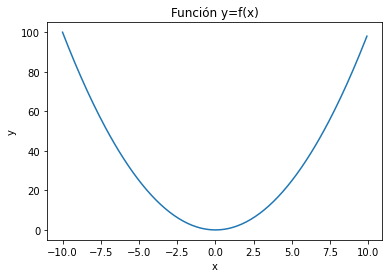

In [3]:
plt.plot(x,f(x))
plt.title('Función y=f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Definición del problema

Dada integral definida: $ \int_{a}^{b} f(x) \,dx $, el problema a resolver es equivalente a calcular el área bajo la curva de la función $f(x)$. <br><br>
Para ello se dispone de diferentes métodos que con más o menos aproximación particionan el área bajo la función y calculan su suma.


## 1. Regla del rectángulo

Esta es la aprimaximación más simple. Consiste en partir el dominio de integración $[a,b]$ en $n$ rectangulos de ancho $h=x_{i}-x_{i-1}$ y altura $f(x_i)$ tal que $i=1,...,n$, $x_0=a$ y $x_n=b$, <br> De modo que la integral queda: 
<br><br>
<div align="center">$ \int_{a}^{b} f(x) \,dx \approx \sum_{i=1}^n f(x_i)(x_{i}-x_{i-1})$
<br><br>
<div align="left">O de otro modo en función del ancho (el paso) $h$:
<br><br>
<div align="center">$ \int_{a}^{b} f(x) \,dx \approx \sum_{i=1}^n f(x_i)h$


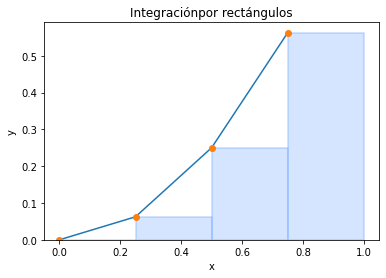

Resultado =  0.219
Paso h =  0.25


In [4]:
a = 0
b = 1
n_rectangles = 4
h = (b-a)/n_rectangles

x = np.linspace(start=a, stop=b, num=n_rectangles, endpoint=False)

integral = sum(f(x)*h)

plt.plot(x,f(x))
plt.bar(x,f(x),width=h, alpha=0.4, align='edge', color='#99c0ff', edgecolor='#6ba4ff', lw=1.5)
plt.plot(x,f(x),'o')
plt.title('Integraciónpor rectángulos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('Resultado = ',round(integral,3))
print('Paso h = ',round(h,3))

## 1.1. Regla del punto medio
Una modificación del criterio anterior es tomar el valor central del rectángulo en vez del vértice izquierdo.
<br><br>
<div align="center">$ \int_{a}^{b} f(x) \,dx \approx \sum_{i=1}^n f(x_{i-1/2})(x_{i}-x_{i-1})$
<br><br>
<div align="left">En función del ancho (el paso) $h$:
<br><br>
<div align="center">$ \int_{a}^{b} f(x) \,dx \approx \sum_{i=1}^n f(x_{i-1/2})h$

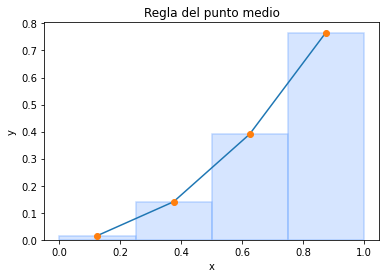

Resultado =  0.328
Paso h =  0.25


In [5]:
a = 0
b = 1
n_rectangles = 4
h = (b-a)/n_rectangles

x = np.linspace(start=a, stop=b, num=n_rectangles, endpoint=False)
x_mid = x + h/2

integral = sum(f(x_mid)*h)

plt.plot(x_mid,f(x_mid))
plt.bar(x,f(x_mid),width=h, alpha=0.4, align='edge', color='#99c0ff', edgecolor='#6ba4ff', lw=1.5)
plt.plot(x_mid,f(x_mid),'o')
plt.title('Regla del punto medio')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('Resultado = ',round(integral,3))
print('Paso h = ',round(h,3))

## 2. Método del trapecio

Para aumentar la precisión se aproxima con un polinomio de primer orden:
<br><br>
<div align="center">$ \int_{a}^{b} f(x) \,dx \approx \sum_{i=1}^n \frac{f(x_{i})+f(x_{i-1})}{2}(x_{i}-x_{i-1})$
<br><br>
<div align="left">En función del ancho (el paso) $h$:
<br><br>
<div align="center">$ \int_{a}^{b} f(x) \,dx \approx \sum_{i=1}^n \frac{f(x_{i})+f(x_{i-1})}{2}h$



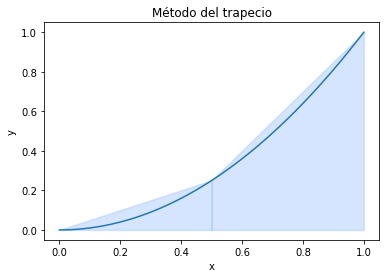

Resultado =  0.375
Paso h =  0.5


In [6]:
a = 0
b = 1
n_rectangles = 2
h = (b-a)/n_rectangles

x = np.linspace(start=a, stop=b, num=n_rectangles, endpoint=False)
x_1 = x + h

integral = sum(((f(x_1)+f(x))/2)*h)

x_plot = np.linspace(start=a, stop=b, num=100, endpoint=True)
plt.plot(x_plot,f(x_plot))
for i in range(0,len(x)):
    plt.fill_between([x[i],x_1[i]],[f(x[i]),f(x_1[i])],alpha=0.4,color='#99c0ff',lw=1.5)

plt.title('Método del trapecio')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('Resultado = ',round(integral,3))
print('Paso h = ',round(h,3))



## 3. Método de Simpson
<br>
<div align="center"> $ \int_{a}^{b} f(x) \,dx \approx \frac{x_{i-1}-x_{i}}{6}[f(x_{i-1})+4f(\frac{x_{i-1}+x_{i}}{2})+f(x_{i})]$
<br><br>
<div align="left">En función del ancho (el paso) $h$:
<br><br>
<div align="center">$ \int_{a}^{b} f(x) \,dx \approx \frac{h}{6}[f(x_{i-1})+4f(\frac{x_{i-1}+x_{i}}{2})+f(x_{i})]$

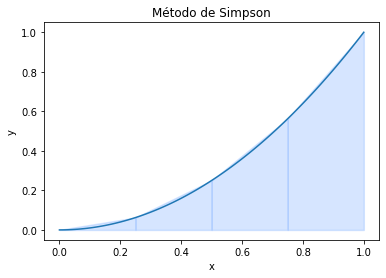

Resultado =  0.333
Paso h =  0.25


In [7]:
a = 0
b = 1
n_rectangles = 4
h = (b-a)/n_rectangles

x = np.linspace(start=a, stop=b, num=n_rectangles, endpoint=False)
x_1 = x + h

integral = sum((4*f((x_1+x)/2)+f(x)+f(x_1))*h/6)

x_plot = np.linspace(start=a, stop=b, num=100, endpoint=True)
plt.plot(x_plot,f(x_plot))
for i in range(0,len(x)):
    plt.fill_between([x[i],x_1[i]],[f(x[i]),f(x_1[i])],alpha=0.4,color='#99c0ff',lw=1.5)

plt.title('Método de Simpson')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('Resultado = ',round(integral,3))
print('Paso h = ',round(h,3))

## 4. Error cometido para cada método

Dado que es una aproximación podemos preguntarnos cómo describir el error cometido con este método:
<br><br>
<div align="center"> 
    $Error =  \int_{a}^{b} f(x) \,dx - aproximación$
<br><br>
    <div align="left"> 
    Ejemplo: <br>
    $Error =  \int_{a}^{b} f(x) \,dx - \sum_{i=1}^n f(x_i)h$
        <br>
Por lo tanto como se puede inferir cuanto más pequeño sea h, menor será el error cometido.

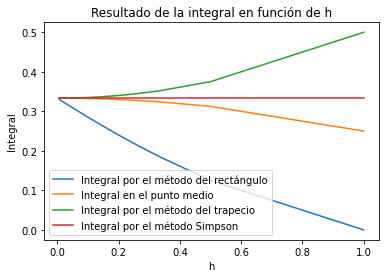

In [8]:
a = 0
b = 1

n_rectangles_res = np.arange(start = 1, stop = 150, step = 1)
h_res = (b-a)/n_rectangles_res

x = np.array([np.linspace(start=a, stop=b, num=n_rectangles, endpoint=False) for n_rectangles in n_rectangles_res],dtype=object)
x_mid = x + h_res/2
x_1 = x + h_res

integral_rec = np.array([ sum(i)  for i in f(x)*h_res],dtype=object)
integral_mid = np.array([ sum(i)  for i in f(x_mid)*h_res],dtype=object)
integral_trap = np.array([ sum(i)  for i in ((f(x_1)+f(x))/2)*h_res],dtype=object)
integral_simpson = np.array([ sum(i)  for i in (4*f((x_1+x)/2)+f(x)+f(x_1))*h_res/6],dtype=object)

plt.plot(h_res,integral_rec,label='Integral por el método del rectángulo')
plt.plot(h_res,integral_mid,label='Integral en el punto medio')
plt.plot(h_res,integral_trap,label='Integral por el método del trapecio')
plt.plot(h_res,integral_simpson,label='Integral por el método Simpson')

plt.title('Resultado de la integral en función de h')
plt.xlabel('h')
plt.ylabel('Integral')
plt.legend()
plt.show()